# Data Mining

Data mining is the process of exploring data and finding patterns in it using machine learning, statistics, and database systems.

- How to structure your analysis for data mining
- How to present your analysis
- How to perform data mining on a Titanic survivors dataset

### These are the questions that we'll answer:

- Which passenger class has the maximum number of survivors?
- What is the distribution, based on gender, of the survivors among the different classes?
- What is the distribution of the nonsurvivors among classes that have relatives aboard the ship?
- What is the survival percentage among different age groups?


In [1]:
import pandas as pd
import pylab as plt
import numpy as np

In [16]:
df = pd.read_csv('../Datasets/titanic/train.csv')
df[0:5]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
pclass= df['Pclass'].isnull().value_counts()
survived=df['Survived'].isnull().value_counts()

print("Class: ",pclass)
print("Survived: ", survived)


Class:  False    891
Name: Pclass, dtype: int64
Survived:  False    891
Name: Survived, dtype: int64


In [19]:
#Passengers survived in each class

survivors = df.groupby('Pclass')['Survived'].agg(sum)
survivors

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [20]:
#Total Passengers in each class

total_passengers = df.groupby('Pclass')['PassengerId'].count()
survivor_percentage = survivors / total_passengers

In [21]:
total_passengers

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64

In [22]:
survivor_percentage

Pclass
1    0.629630
2    0.472826
3    0.242363
dtype: float64

### Plotting the Total number of survivors

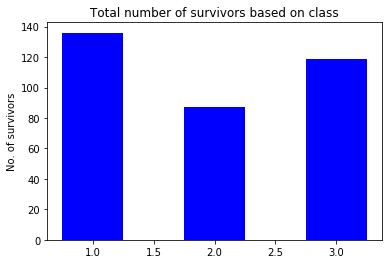

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)
rect = ax.bar(survivors.index.values.tolist(),survivors, color='blue', width=0.5)
ax.set_ylabel('No. of survivors')
ax.set_title('Total number of survivors based on class')
#xTickMarks = survivors.index.values.tolist()
#ax.set_xticks(survivors.index.values.tolist())
#xtickNames = ax.set_xticklabels(xTickMarks)
#plt.setp(xtickNames, fontsize=20)
plt.show()

### Plotting the percentage of survivors in each class

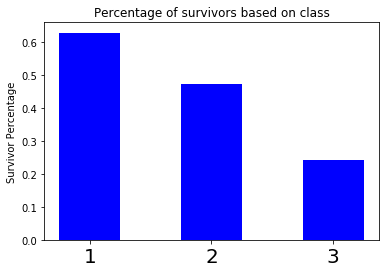

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)
rect = ax.bar(survivor_percentage.index.values.tolist(),survivor_percentage, color='blue', width=0.5)
ax.set_ylabel('Survivor Percentage')
ax.set_title('Percentage of survivors based on class')
xTickMarks = survivors.index.values.tolist()
ax.set_xticks(survivors.index.values.tolist())
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.show()

 ### What is the distribution of survivors based on gender among the various classes?

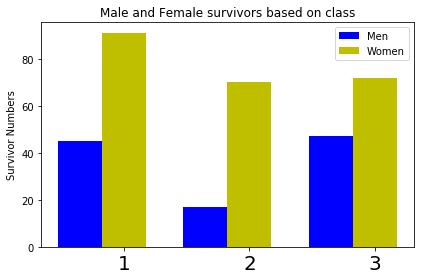

In [41]:
#Checking for any null values
df['Sex'].isnull().value_counts()

male_survivors = df[df['Sex'] == 'male'].groupby('Pclass')['Survived'].agg(sum)

#Total Male Passengers in each class
male_total_passengers = df[df['Sex'] == 'male'].groupby('Pclass')['PassengerId'].count()
male_survivor_percentage = male_survivors / male_total_passengers

# Female Passengers survived in each class
female_survivors = df[df['Sex'] == 'female'].groupby('Pclass')['Survived'].agg(sum)

#Total Female Passengers in each class
female_total_passengers = df[df['Sex'] == 'female'].groupby('Pclass')['PassengerId'].count()
female_survivor_percentage = female_survivors / female_total_passengers

#Plotting the total passengers who survived based on Gender
fig = plt.figure()
ax = fig.add_subplot(111)
index = np.arange(male_survivors.count())
bar_width = 0.35
rect1 = ax.bar(index, male_survivors, bar_width, color='blue',label='Men')
rect2 = ax.bar(index + bar_width, female_survivors, bar_width,color='y', label='Women')


ax.set_ylabel('Survivor Numbers')
ax.set_title('Male and Female survivors based on class')
xTickMarks = male_survivors.index.values.tolist()
ax.set_xticks(index + bar_width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.legend()
plt.tight_layout()
plt.show()


### Plotting the percentage of passengers who survived based on Gender

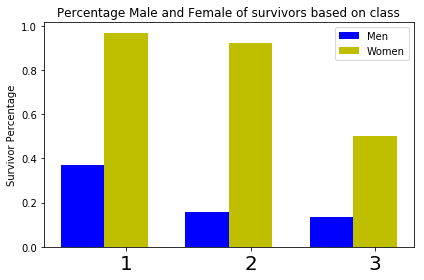

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111)
index = np.arange(male_survivor_percentage.count())
bar_width = 0.35
rect1 = ax.bar(index, male_survivor_percentage, bar_width,color='blue', label='Men')
rect2 = ax.bar(index + bar_width, female_survivor_percentage,bar_width, color='y', label='Women')
ax.set_ylabel('Survivor Percentage')

ax.set_title('Percentage Male and Female of survivors based on class')
xTickMarks = male_survivor_percentage.index.values.tolist()
ax.set_xticks(index + bar_width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.legend()
plt.tight_layout()
plt.show()

### What is the distribution of nonsurvivors among the various classes who have family aboard the ship?

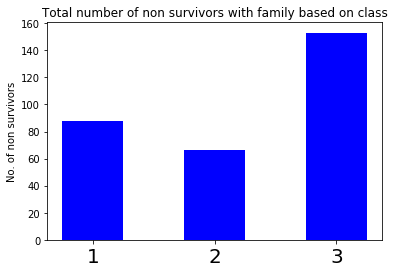

In [46]:
#Checking for the null values
df['SibSp'].isnull().value_counts()

#Checking for the null values
df['Parch'].isnull().value_counts()

#Total number of non-survivors in each class
non_survivors = df[(df['SibSp'] > 0) | (df['Parch'] > 0) & (df['Survived'] == 0)].groupby('Pclass')['Survived'].agg('count')

#Total passengers in each class
total_passengers = df.groupby('Pclass')['PassengerId'].count()
non_survivor_percentage = non_survivors / total_passengers

#Total number of non survivors with family based on class

fig = plt.figure()
ax = fig.add_subplot(111)
rect = ax.bar(non_survivors.index.values.tolist(), non_survivors,color='blue', width=0.5)
ax.set_ylabel('No. of non survivors')
ax.set_title('Total number of non survivors with family based on class')
xTickMarks = non_survivors.index.values.tolist()
ax.set_xticks(non_survivors.index.values.tolist())
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.show()


In [50]:
### Plot of percentage of non survivors with family based on class

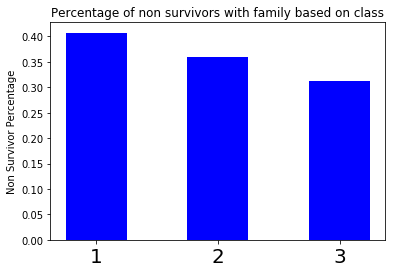

In [49]:

fig = plt.figure()
ax = fig.add_subplot(111)
rect = ax.bar(non_survivor_percentage.index.values.tolist(), non_survivor_percentage, color='blue', width=0.5)
ax.set_ylabel('Non Survivor Percentage')
ax.set_title('Percentage of non survivors with family based on class')
xTickMarks = non_survivor_percentage.index.values.tolist()
ax.set_xticks(non_survivor_percentage.index.values.tolist())
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.show()

### What was the survival percentage among different age groups?

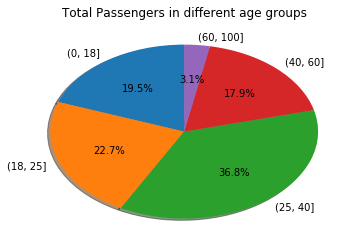

In [51]:
#Checking for null values
df['Age'].isnull().value_counts()

#Defining the age binning interval
age_bin = [0, 18, 25, 40, 60, 100]

#Creating the bins
df['AgeBin'] = pd.cut(df.Age, bins=age_bin)

#Removing the null rows
d_temp = df[np.isfinite(df['Age'])] # removing all na instances

#Number of survivors based on Age bin
survivors = d_temp.groupby('AgeBin')['Survived'].agg(sum)
#Total passengers in each bin

total_passengers = d_temp.groupby('AgeBin')['Survived'].agg('count')
#Plotting the pie chart of total passengers in each bin
plt.pie(total_passengers,labels=total_passengers.index.values.tolist(),autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Total Passengers in different age groups')
plt.show()

### Plotting the pie chart of percentage passengers in each bin

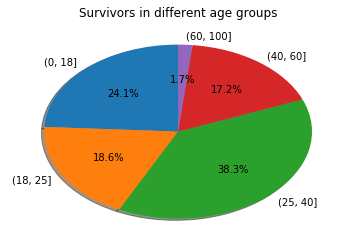

In [52]:
plt.pie(survivors, labels=survivors.index.values.tolist(),autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Survivors in different age groups')
plt.show()